<a href="https://colab.research.google.com/github/akashroy20/python-ineuron/blob/master/knn_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/nba_2013.csv')
df

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013


In [5]:
df.select_dtypes(exclude='number').columns

Index(['player', 'pos', 'bref_team_id', 'season'], dtype='object')

In [6]:
df.select_dtypes(include='number').columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'season_end'],
      dtype='object')

In [7]:
df1 = df[df.select_dtypes(include='number').columns]

#### removing null values

In [8]:
df2 = df[df.columns[df.isnull().any()]]
df2.head()

,fg.,x3p.,x2p.,efg.,ft.
0,0.468,0.266667,0.492063,0.482,0.660
1,0.503,NaN,0.502703,0.503,0.581
2,0.520,NaN,0.520000,0.520,0.639
3,0.459,0.426667,0.472574,0.522,0.815
4,0.546,0.000000,0.548387,0.546,0.836


In [9]:
df2.isnull().sum()

fg.      2
x3p.    67
x2p.     3
efg.     2
ft.     20
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

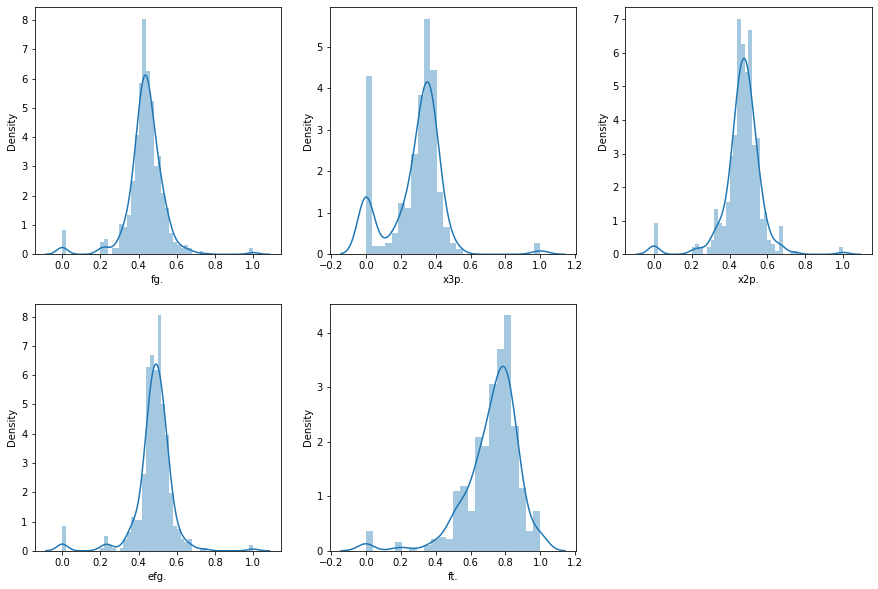

In [10]:
plt.figure(figsize=(15,10), facecolor='white')
plotnumber = 1

for column in df2:
    if plotnumber<=5 :     
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [52]:
df1['fg.']=df1['fg.'].fillna(df1['fg.'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df1['x3p.'] = df1['x3p.'].fillna(df1['x3p.'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df1['ft.'] = df1['ft.'].fillna(df1['ft.'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df1['x2p.'] = df1['x2p.'].fillna(df1['x2p.'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df1['efg.'] = df1['efg.'].fillna(df1['efg.'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df1.isnull().sum()

age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg.           0
x3p           0
x3pa          0
x3p.          0
x2p           0
x2pa          0
x2p.          0
efg.          0
ft            0
fta           0
ft.           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
season_end    0
dtype: int64

##### Feature selection according to variance inflation factor having value less than 5

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [64]:
X = df1.drop(columns = ['pts'])
y = df1['pts']

In [65]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [66]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,1.119282,age
1,8.049546,g
2,6.164760,gs
3,44.114383,mp
4,inf,fg
5,inf,fga
6,19.477227,fg.
7,inf,x3p
8,inf,x3pa
9,1.770228,x3p.


In [67]:
feature = []
a = []
for i in range(len(vif['vif'])):
  a.append(vif['vif'][i])
  if a[i]<5:
    feature.append(vif['Features'][i])

In [68]:
df2 = df[df.select_dtypes(exclude='number').columns]
df2 = df2.drop(columns = ['bref_team_id','season'])
df2['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [69]:
df2 = pd.get_dummies(df['pos'], drop_first=True)
df2['player'] = df['player']
df2[feature]=df1[feature]
df2['pts'] = df['pts']
df2

,F,G,PF,PG,SF,SG,player,age,x3p.,ft.,blk,pts
0,0,0,0,0,1,0,Quincy Acy,23,0.266667,0.660,26,171
1,0,0,0,0,0,0,Steven Adams,20,0.330976,0.581,57,265
2,0,0,1,0,0,0,Jeff Adrien,27,0.330976,0.639,36,362
3,0,0,0,0,0,1,Arron Afflalo,28,0.426667,0.815,3,1330
4,0,0,0,0,0,0,Alexis Ajinca,25,0.000000,0.836,46,328
...,...,...,...,...,...,...,...,...,...,...,...,...
476,0,0,0,0,0,1,Tony Wroten,20,0.212766,0.641,16,939
477,0,0,0,0,0,1,Nick Young,28,0.385714,0.825,12,1144
478,0,0,1,0,0,0,Thaddeus Young,25,0.308219,0.712,36,1417
479,0,0,0,0,0,0,Cody Zeller,21,0.000000,0.730,41,490


In [70]:
from sklearn.cluster import KMeans

In [71]:
kmean_model = KMeans(n_clusters = 5,random_state = 41)    #kmeans model with 5 clusters
num_columns = df2._get_numeric_data()                     #getting numeric data from dataset 
kmean_model.fit(num_columns)                              #training the model
labels = kmean_model.labels_                              #getting the labels
print(labels)

[3 0 0 1 0 3 4 0 2 0 0 3 0 0 2 0 0 4 3 0 1 3 0 0 2 3 3 3 3 3 2 0 2 2 3 2 0
 1 2 3 0 1 0 2 3 0 3 3 3 0 0 2 2 3 3 0 3 0 1 1 2 0 1 3 2 3 3 3 3 0 3 2 1 0
 2 3 3 3 0 0 2 0 3 2 2 1 0 2 0 2 3 3 0 3 3 0 3 2 0 1 3 4 3 3 1 2 0 0 3 3 4
 0 3 3 3 1 0 2 3 3 3 0 1 4 2 0 3 0 4 1 0 1 2 4 3 3 4 3 0 3 1 1 0 3 2 3 2 3
 0 2 1 3 0 3 2 0 0 3 2 1 1 0 4 1 2 3 3 3 3 3 1 1 0 3 2 0 1 1 0 4 3 0 3 0 2
 4 0 3 3 0 3 3 3 2 3 1 3 1 1 0 2 2 2 2 2 2 3 2 0 3 3 0 1 3 0 1 0 2 1 3 2 1
 3 3 3 4 3 3 3 4 2 3 1 0 2 3 0 1 3 2 3 3 3 3 2 2 0 0 1 3 0 0 3 1 2 0 3 3 3
 2 3 3 1 3 2 1 3 2 3 0 0 3 4 2 2 0 2 4 1 3 0 0 2 0 0 3 1 3 1 3 3 2 3 0 3 3
 2 2 1 3 1 0 0 3 0 0 2 1 3 3 1 0 3 2 1 2 0 3 2 3 3 3 3 3 3 3 0 3 2 0 1 3 4
 3 0 0 3 1 2 3 3 0 0 3 1 1 0 1 2 3 1 3 0 2 3 3 3 3 3 3 3 0 3 3 3 1 0 3 0 0
 3 2 0 0 0 3 2 2 3 0 0 3 3 2 2 0 3 1 3 3 0 3 0 2 3 3 3 3 3 0 1 0 1 0 3 0 0
 3 1 3 3 2 1 1 3 3 1 3 2 3 3 3 3 1 3 3 0 0 1 2 2 3 0 2 3 3 1 3 3 3 2 0 3 2
 3 3 2 3 1 1 1 4 0 3 0 3 3 2 1 1 3 3 2 2 0 2 2 2 3 3 3 0 3 0 3 0 2 1 1 0 0]


In [72]:
df2['cluster_no'] = labels 
df2

,F,G,PF,PG,SF,SG,player,age,x3p.,ft.,blk,pts,cluster_no
0,0,0,0,0,1,0,Quincy Acy,23,0.266667,0.660,26,171,3
1,0,0,0,0,0,0,Steven Adams,20,0.330976,0.581,57,265,0
2,0,0,1,0,0,0,Jeff Adrien,27,0.330976,0.639,36,362,0
3,0,0,0,0,0,1,Arron Afflalo,28,0.426667,0.815,3,1330,1
4,0,0,0,0,0,0,Alexis Ajinca,25,0.000000,0.836,46,328,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0,0,0,0,0,1,Tony Wroten,20,0.212766,0.641,16,939,2
477,0,0,0,0,0,1,Nick Young,28,0.385714,0.825,12,1144,1
478,0,0,1,0,0,0,Thaddeus Young,25,0.308219,0.712,36,1417,1
479,0,0,0,0,0,0,Cody Zeller,21,0.000000,0.730,41,490,0


In [73]:
df2[df2['cluster_no'] == 0] 

,F,G,PF,PG,SF,SG,player,age,x3p.,ft.,blk,pts,cluster_no
1,0,0,0,0,0,0,Steven Adams,20,0.330976,0.581,57,265,0
2,0,0,1,0,0,0,Jeff Adrien,27,0.330976,0.639,36,362,0
4,0,0,0,0,0,0,Alexis Ajinca,25,0.000000,0.836,46,328,0
7,0,0,1,0,0,0,Lavoy Allen,24,0.153846,0.660,33,303,0
9,0,0,0,0,0,1,Tony Allen,32,0.234043,0.628,19,495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,0,0,1,0,0,Nate Wolters,22,0.290323,0.656,15,417,0
473,0,0,0,0,0,0,Brandan Wright,26,0.330976,0.726,55,525,0
475,0,0,0,0,1,0,Dorell Wright,28,0.341584,0.754,16,343,0
479,0,0,0,0,0,0,Cody Zeller,21,0.000000,0.730,41,490,0


In [74]:
X = df2.drop(columns=['player','cluster_no','pts'])
X

,F,G,PF,PG,SF,SG,age,x3p.,ft.,blk
0,0,0,0,0,1,0,23,0.266667,0.660,26
1,0,0,0,0,0,0,20,0.330976,0.581,57
2,0,0,1,0,0,0,27,0.330976,0.639,36
3,0,0,0,0,0,1,28,0.426667,0.815,3
4,0,0,0,0,0,0,25,0.000000,0.836,46
...,...,...,...,...,...,...,...,...,...,...
476,0,0,0,0,0,1,20,0.212766,0.641,16
477,0,0,0,0,0,1,28,0.385714,0.825,12
478,0,0,1,0,0,0,25,0.308219,0.712,36
479,0,0,0,0,0,0,21,0.000000,0.730,41


In [75]:
y = df2['pts']

In [76]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [78]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [79]:
y_pred = knn.predict(x_test)

In [80]:
knn.score(x_train,y_train)

0.6003256527895928

##### Univariate feature selection 

In [119]:
df3 = df.drop(columns=['player','bref_team_id','season','season_end'])
df3

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171
1,C,20,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,SG,20,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939
477,SG,28,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144
478,PF,25,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417
479,C,21,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490


In [120]:
df3['fg.']=df3['fg.'].fillna(df3['fg.'].mode()[0])

In [121]:
df3['x3p.'] = df3['x3p.'].fillna(df3['x3p.'].median())

In [122]:
df3['ft.'] = df3['ft.'].fillna(df3['ft.'].mode()[0])

In [123]:
df3['x2p.'] = df3['x2p.'].fillna(df3['x2p.'].mode()[0])

In [124]:
df3['efg.'] = df3['efg.'].fillna(df3['efg.'].mode()[0])

In [125]:
df3 = pd.get_dummies(df3, drop_first=True)
df3

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.330976,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,0,0,0,0,0,1
477,28,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,0,0,0,0,0,1
478,25,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,0,0,1,0,0,0
479,21,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,0,0,0,0,0,0


In [126]:
X = df3.drop(columns = ['pts'])
y = df3['pts']

In [127]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [115]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,Features
0,1.147272,age
1,8.164187,g
2,6.281147,gs
3,47.562302,mp
4,inf,fg
5,inf,fga
6,23.257797,fg.
7,inf,x3p
8,inf,x3pa
9,1.798393,x3p.


In [116]:
from sklearn.feature_selection import SelectKBest, chi2

In [128]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [130]:
dfscore=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
dfcolumns = pd.DataFrame(X.columns)

In [137]:
features_rank = pd.concat([dfcolumns,dfscore], axis = 1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,258.055107
1,g,5590.973673
2,gs,16112.658268
3,mp,310319.267433
4,fg,73367.203563
5,fga,153611.501722
6,fg.,7.197300
7,x3p,29424.718710
8,x3pa,72361.618466
9,x3p.,25.817899


In [136]:
f10 = features_rank.nlargest(10,'Score')
f10

,Features,Score
3,mp,310319.267433
5,fga,153611.501722
11,x2pa,130513.593792
19,trb,84892.125077
4,fg,73367.203563
8,x3pa,72361.618466
20,ast,69933.567876
15,fta,67655.227961
10,x2p,66905.820565
18,drb,60315.688059


In [139]:
f10_features = list(f10['Features'])
f10_features

['mp', 'fga', 'x2pa', 'trb', 'fg', 'x3pa', 'ast', 'fta', 'x2p', 'drb']

In [142]:
df4 = df3[f10_features]
df4

,mp,fga,x2pa,trb,fg,x3pa,ast,fta,x2p,drb
0,847,141,126,216,66,15,28,53,62,144
1,1197,185,185,332,93,0,43,136,93,190
2,961,275,275,306,143,0,38,119,143,204
3,2552,1011,711,262,464,300,248,336,336,230
4,951,249,248,277,136,1,40,67,136,183
...,...,...,...,...,...,...,...,...,...,...
476,1765,808,620,228,345,188,217,326,305,159
477,1810,889,539,166,387,350,95,285,252,137
478,2718,1283,991,476,582,292,182,229,492,310
479,1416,404,403,353,172,1,92,200,172,235


In [143]:
df4.isnull().sum()

mp      0
fga     0
x2pa    0
trb     0
fg      0
x3pa    0
ast     0
fta     0
x2p     0
drb     0
dtype: int64

In [144]:
X = df4
y = df3['pts']

In [145]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [146]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [147]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [149]:
y_pred = knn.predict(x_test)

In [150]:
knn.score(x_train,y_train)

0.9862718682593077

##### KNN model with all features

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [95]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [96]:
y_pred = knn.predict(x_test)

In [97]:
knn.score(x_train,y_train)

0.9655157303554331

##### Feature selection according to variance inflation factor having value less than 10

In [98]:
feature = []
a = []
for i in range(len(vif['vif'])):
  a.append(vif['vif'][i])
  if a[i]<10:
    feature.append(vif['Features'][i])

In [99]:
feature

['age',
 'g',
 'gs',
 'x3p.',
 'x2p.',
 'ft.',
 'ast',
 'stl',
 'blk',
 'pos_F',
 'pos_G',
 'pos_PF',
 'pos_PG',
 'pos_SF',
 'pos_SG']

In [100]:
X = df3[feature]
y = df3['pts']
X

,age,g,gs,x3p.,x2p.,ft.,ast,stl,blk,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,0.266667,0.492063,0.660,28,23,26,0,0,0,0,1,0
1,20,81,20,0.330976,0.502703,0.581,43,40,57,0,0,0,0,0,0
2,27,53,12,0.330976,0.520000,0.639,38,24,36,0,0,1,0,0,0
3,28,73,73,0.426667,0.472574,0.815,248,35,3,0,0,0,0,0,1
4,25,56,30,0.000000,0.548387,0.836,40,23,46,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,72,16,0.212766,0.491935,0.641,217,78,16,0,0,0,0,0,1
477,28,64,9,0.385714,0.467532,0.825,95,46,12,0,0,0,0,0,1
478,25,79,78,0.308219,0.496468,0.712,182,167,36,0,0,1,0,0,0
479,21,82,3,0.000000,0.426799,0.730,92,40,41,0,0,0,0,0,0


In [101]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [102]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [103]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [104]:
y_pred = knn.predict(x_test)

In [105]:
knn.score(x_train,y_train)

0.8527065567795153